# Projekat iz predmeta analiza socijalnih mreza


## Kvantitativna i kvalitativna Analiza stanja profesionalnog muškog tenisa u periodu od 2018. do 2020. godine

2019.godina Analiza

Ucitavanje podataka

In [1]:
import pandas as pd

dataPath = "data/atp_matches_2019.csv"

players_dataPath = "data/atp_players.csv"

player_atp_rankings_dataPath = "data/atp_rankings_10s.csv"

data = pd.read_csv(dataPath) 
#print(data.columns)
data.isna().any()

#players
players_data = pd.read_csv(players_dataPath)
#print(players_data)

#atp ranking
players_atp_rank_data = pd.read_csv(player_atp_rankings_dataPath)
players_atp_rank_data.isna().any()
#points null moze biti
#print(players_atp_rank_data)


ranking_date    False
rank            False
player          False
points           True
dtype: bool

In [2]:
#provera da li je match_num kolona koja moze da bude uzeta za id

print(data['match_num'].isnull().values.any())
print(data['match_num'].is_unique)

#Ovaj set podataka sadrzi meceve sa datumima 31.12.2018 jer su turniri koji pripadaju 2019. godini poceli sa odrzavanjem 30/31.12.2018 (Brisbane and Pune)
maska_2018 = (data['tourney_date']<20190101)
print(data[maska_2018])

False
False
   tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0   2019-M020     Brisbane    Hard         32             A      20181231   
1   2019-M020     Brisbane    Hard         32             A      20181231   
2   2019-M020     Brisbane    Hard         32             A      20181231   
3   2019-M020     Brisbane    Hard         32             A      20181231   
4   2019-M020     Brisbane    Hard         32             A      20181231   
..        ...          ...     ...        ...           ...           ...   
80  2019-0891         Pune    Hard         32             A      20181231   
81  2019-0891         Pune    Hard         32             A      20181231   
82  2019-0891         Pune    Hard         32             A      20181231   
83  2019-0891         Pune    Hard         32             A      20181231   
84  2019-0891         Pune    Hard         32             A      20181231   

    match_num  winner_id  winner_seed winner_entry  ... l_1stIn

In [3]:
#dodati automatski generisani id kao dodatnu kolonu
data['id'] = data.index
print(data)

#sacuvati u novi fajl
import pickle

with open("data/data2019_cleaned.csv", 'wb') as file:
    pickle.dump(data, file)

                           tourney_id                  tourney_name surface  \
0                           2019-M020                      Brisbane    Hard   
1                           2019-M020                      Brisbane    Hard   
2                           2019-M020                      Brisbane    Hard   
3                           2019-M020                      Brisbane    Hard   
4                           2019-M020                      Brisbane    Hard   
...                               ...                           ...     ...   
2776  2019-M-DC-2019-QLS-M-SUI-RUS-01  Davis Cup QLS R1: SUI vs RUS    Hard   
2777  2019-M-DC-2019-QLS-M-SUI-RUS-01  Davis Cup QLS R1: SUI vs RUS    Hard   
2778  2019-M-DC-2019-QLS-M-SWE-COL-01  Davis Cup QLS R1: SWE vs COL    Clay   
2779  2019-M-DC-2019-QLS-M-SWE-COL-01  Davis Cup QLS R1: SWE vs COL    Clay   
2780  2019-M-DC-2019-QLS-M-SWE-COL-01  Davis Cup QLS R1: SWE vs COL    Clay   

      draw_size tourney_level  tourney_date  match_

In [4]:
import numpy as np

# Selekcija samo kolona 'match_num' i 'id' i grupisanje po match_num
data_grupisano = data[['match_num', 'id']].groupby('match_num')

# agg() radi agregaciju, u ovom slučaju po broju elemenata u grupi
data_agregirano = data_grupisano['id'].agg(np.size)
print(type(data_agregirano))
print(data_agregirano)

<class 'pandas.core.series.Series'>
match_num
1       60
2       60
4       35
5       17
100      3
        ..
1503     1
1504     1
1601     1
1602     1
1701     1
Name: id, Length: 327, dtype: int64


In [5]:
data_nonunique = data_agregirano[data_agregirano>1]
print(data_nonunique)

match_num
1      60
2      60
4      35
5      17
100     3
       ..
296    62
297    62
298    62
299    62
300    62
Name: id, Length: 200, dtype: int64


In [6]:
#naci max i index max broja ponovljenih
trazeni = data_nonunique[data_nonunique == data_nonunique.max()]
print(trazeni)
target_match_num = trazeni.keys()[0]
print(target_match_num)

match_num
286    62
287    62
288    62
289    62
290    62
291    62
292    62
293    62
294    62
295    62
296    62
297    62
298    62
299    62
300    62
Name: id, dtype: int64
286


In [7]:
#ispisati sve meceve kao match_num imaju odredjeni max
data_target = data[data['match_num'] == target_match_num]
lista_labela = ['tourney_name', 'winner_id', 'loser_id', 'winner_rank', 'loser_rank']
print(data_target[lista_labela])

#ispisi sve ciji je ili winner_rank null ili loser_rank null
data_winOrlos_is_null = data_target[(data_target['winner_rank'].isnull()) | (data_target['loser_rank'].isnull())]
print(data_winOrlos_is_null)

#istraga o igracima ciji je winner_rank u tabeli matches_2019 null ili loser_rank u tabeli matches_2019 null
print(players_data['player_id'].equals(data_winOrlos_is_null['winner_id']))
players_info_rang_null = players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))]
print(players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))])

#postoje neki koji uopste nemaju upisanu ruku i datum rodjenja, datum rodjenja format double iako u opisu drugaciji format

       tourney_name  winner_id  loser_id  winner_rank  loser_rank
14         Brisbane     105453    106045          9.0        63.0
41             Doha     105732    109739         55.0        74.0
72             Pune     105208    111202         95.0        25.0
99         Auckland     104926    105376         13.0        60.0
126          Sydney     111442    106121         72.0        78.0
...             ...        ...       ...          ...         ...
2472      Stockholm     105023    105777         50.0        27.0
2499          Basel     200282    126203         28.0        31.0
2530         Vienna     111575    105916          9.0        67.0
2561  Paris Masters     104745    104527          2.0        16.0
2608    Tour Finals     126610    106233          8.0         5.0

[62 rows x 5 columns]
Empty DataFrame
Columns: [tourney_id, tourney_name, surface, draw_size, tourney_level, tourney_date, match_num, winner_id, winner_seed, winner_entry, winner_name, winner_hand, winner_ht

In [8]:
#players_info_rang_null 
#players_atp_rank_data
columns_name_players_atp_rank = ['ranking_date', 'rank', 'player', 'points']
print(players_atp_rank_data[columns_name_players_atp_rank])
print(players_atp_rank_data[columns_name_players_atp_rank].groupby('player').mean())

        ranking_date  rank  player   points
0           20100104     1  103819  10550.0
1           20100104     2  104745   9205.0
2           20100104     3  104925   8310.0
3           20100104     4  104918   7030.0
4           20100104     5  105223   6785.0
...              ...   ...     ...      ...
916291      20191230  1922  134833      1.0
916292      20191230  1922  144856      1.0
916293      20191230  1922  202326      1.0
916294      20191230  1926  207307      1.0
916295      20191230  1927  208186      1.0

[916296 rows x 4 columns]
        ranking_date         rank       points
player                                        
100644  2.015885e+07   247.552326  2102.796512
101389  2.014282e+07  1724.404255     1.000000
101397  2.011134e+07  1204.478261     3.000000
101404  2.011255e+07  1031.626374     6.571429
101549  2.010697e+07  1468.750000     1.000000
...              ...          ...          ...
209397  2.019123e+07  1581.000000     1.000000
209398  2.019122e+07  

In [9]:
import networkx as nx

list_winner = set(data['winner_id'].apply(str).unique())
#print(list_winner)
list_loser = set(data['loser_id'].apply(str).unique())
#print(list_loser)

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

print(data.columns)

Postoji 364 različitih igrača
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'id'],
      dtype='object')


In [10]:
#videti timestamp u tabeli 10s, iz koje je godine, i koji je datum
#proveriti za podatke za 2018, 2019 u fajlovima koji objasnjavaju meceve, neki mec posle tog datuma koji pise u 10s fajlu
print(players_atp_rank_data.columns)
print(players_atp_rank_data['player'].is_unique)
#players_atp_rank_data.dtypes
maska_active_players = players_atp_rank_data['player'].isin(skup_id) & (players_atp_rank_data['ranking_date']<=20191231) & (players_atp_rank_data['ranking_date']>=20190101)
players_rank_2019 = players_atp_rank_data[maska_active_players]
players_rank_2019 = players_rank_2019.drop_duplicates()

max_players_rank_2019 = players_rank_2019.groupby('player').max()
#print(players_rank_2018[['ranking_date', 'rank', 'player', 'points']].groupby('player').agg({'ranking_date': 'max'}))
#print(players_rank_2018.sort_values('ranking_date').groupby('player').tail(1))
#print(max_players_rank_2018['player'].is_unique)

player_sorted_date_rank_2019 = players_rank_2019.sort_values(['ranking_date'],ascending=False).groupby('player').head(1)
#player_sorted_date_rank_2019 = player_sorted_date_rank_2019['points'].map(str)
#player_sorted_date_rank_2019 = player_sorted_date_rank_2019['rank'].map(str)
print(player_sorted_date_rank_2019.dtypes)
print(players_rank_2019.sort_values(['ranking_date'],ascending=False).groupby('player').head(1))

Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')
False
ranking_date      int64
rank              int64
player            int64
points          float64
dtype: object
        ranking_date  rank  player  points
915968      20191230  1581  144760     1.0
914484      20191230   116  126156   478.0
914476      20191230   108  110602   524.0
914477      20191230   109  105613   507.0
914478      20191230   110  106121   501.0
...              ...   ...     ...     ...
908666      20191209   104  104607   550.0
910483      20191209  1919  122570     1.0
908787      20191209   224  103970   220.0
897042      20191028   253  106058   180.0
867338      20190429   576  105334     5.0

[345 rows x 4 columns]


In [11]:
#provera da li je stvarno poslednji rang 2019-te godine
#print(players_rank_2019[players_rank_2019['player']==200000].sort_values('ranking_date', ascending=False))

#provera da li su svi elementi iz skup_id prisuni u tabeli player_sorted_date_rank_2019
difference_set = set(map(int, skup_id)).difference(set(player_sorted_date_rank_2019['player']))
print(len(difference_set))

maska_diff_nodes_winner = data['winner_id'].isin(difference_set) 
maska_diff_nodes_loser =  data['loser_id'].isin(difference_set)
active_columns_winner = ['winner_id', 'winner_name', 'winner_rank', 'winner_rank_points']
active_columns_loser = ['loser_id', 'loser_name', 'loser_rank', 'loser_rank_points']
winner_miss_data = data[active_columns_winner][maska_diff_nodes_winner]
print(f"Broj nedefinisanih u pobednicima: {len(winner_miss_data)}")
print(winner_miss_data)
loser_miss_data = data[active_columns_loser][maska_diff_nodes_loser]
loser_miss_data.rename(columns = {'loser_id':'winner_id', 'loser_name':'winner_name', 'loser_rank':'winner_rank', 'loser_rank_points':'winner_rank_points'}, inplace = True)
#loser_miss_data.rename_axis({'winner_id', 'winner_name', 'winner_rank', 'winner_rank_points'}, axis="columns")
#loser_miss_data.to_replace(to_replace = active_columns_loser, value = active_columns_winner, inplace=True)
print(f"Broj nedefinisanih u gubitnicima: {len(loser_miss_data)}")
print(loser_miss_data)
#missed_data=loser_miss_data.append(winner_miss_data).drop_duplicates()
#missed_data.rename(columns = {'winner_id' : 'player', 'winner_rank' : 'rank', 'winner_rank_points' : 'points'}, inplace=True)
#print(f"Broj nedefinisanih u gubitnicima: {missed_data}")

19
Broj nedefinisanih u pobednicima: 3
      winner_id              winner_name  winner_rank  winner_rank_points
2711     209188              Ari Fahresi          NaN                 NaN
2714     200460  John Bryan Decasa Otico          NaN                 NaN
2739     202475           Philip Henning          NaN                 NaN
Broj nedefinisanih u gubitnicima: 18
      winner_id                      winner_name  winner_rank  \
2037     104804                   Amir Weintraub          NaN   
2615     105254                    Nikola Mektic          NaN   
2660     104656                      Haydn Lewis          NaN   
2665     200526                        Juan Lugo          NaN   
2697     209238              Sebastian Dominguez          NaN   
2700     132932             Franz Luna Lavidalie          NaN   
2701     137018                       Ayed Zatar          NaN   
2702     134677                       Juan Borba          NaN   
2703     137018                       Ayed 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys

data_reduced = data[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'id']]


G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

for _, winner_id, winner_name, winner_ioc, loser_id, loser_name, loser_ioc, _ in data_reduced.itertuples():
    winner_id_string = str(winner_id)
    loser_id_string = str(loser_id)
    if (winner_id_string, loser_id_string) in G.edges:
        G.edges[winner_id_string, loser_id_string]['weight'] += 1
    else:
        G.add_edge(winner_id_string, loser_id_string, weight=1)
        
        winner = player_sorted_date_rank_2019[player_sorted_date_rank_2019['player'] == int(winner_id)]
        
        if winner.empty:
            winner_rank = str(sys.maxsize)
            winner_points = str(0)
        else:
            winner_rank = str(winner['rank'].values[0])
            winner_points = str(winner['points'].values[0])
        
        loser = player_sorted_date_rank_2019[player_sorted_date_rank_2019['player'] == int(loser_id)]
        
        if loser.empty:
            loser_rank = str(sys.maxsize)
            loser_points = str(0)
        else:
            loser_rank = str(loser['rank'].values[0])
            loser_points = str(loser['points'].values[0])
        winner_attrs = {winner_id_string: {'name': winner_name, 'country': winner_ioc, 'rank': winner_rank, 'points': winner_points}}
        loser_attrs = {loser_id_string: {'name': loser_name, 'country': loser_ioc, 'rank': loser_rank, 'points': loser_points}}
        nx.set_node_attributes(G, winner_attrs)
        nx.set_node_attributes(G, loser_attrs)

In [13]:
print(data.dtypes)
#print(G.edges.data("weight"))
print(nx.get_node_attributes(G, "name"))
print(nx.get_node_attributes(G, "country"))
print(nx.get_node_attributes(G, "points"))

output_path = "models/undirected_graph_2019.gml"

nx.write_gml(G, output_path)

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

1.pitanje Koliki je prosecan broj tenisera(saigraca) po svakom teniseru? 
gephi->ucitala graf, Statistics -> Network Overview -> Average Degree

<img src="img/1.pitanje_average_degree_2019.png" width=500 height=500 />

In [14]:
#2.pitanje Koji teniseri su se susretali sa najvecim brojem drugih tenisera
import operator
my_degrees = dict(sorted(dict(G.degree()).items(), key=operator.itemgetter(1), reverse=True)[:30]) #dictionary key:value
degree_values = [v for k, v in G.degree()]

for key in my_degrees:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key], my_degrees[key])

Daniil Medvedev 5 RUS 60
Benoit Paire 24 FRA 51
Stefanos Tsitsipas 6 GRE 51
Alexander Zverev 7 GER 51
Diego Schwartzman 14 ARG 50
Matteo Berrettini 8 ITA 50
Dominic Thiem 4 AUT 49
Jan Lennard Struff 35 GER 49
Denis Shapovalov 15 CAN 49
Joao Sousa 60 POR 49
David Goffin 11 BEL 49
Taylor Fritz 32 USA 49
Rafael Nadal 1 ESP 48
Roberto Bautista Agut 9 ESP 48
Novak Djokovic 2 SRB 47
Gael Monfils 10 FRA 47
Guido Pella 25 ARG 47
Fernando Verdasco 49 ESP 46
Roger Federer 3 SUI 46
John Millman 48 AUS 46
Gilles Simon 55 FRA 46
Karen Khachanov 17 RUS 46
Alex De Minaur 18 AUS 46
Radu Albot 46 MDA 46
Felix Auger Aliassime 21 CAN 45
Fabio Fognini 12 ITA 45
Christian Garin 33 CHI 44
Dusan Lajovic 34 SRB 44
Andrey Rublev 23 RUS 44
Stan Wawrinka 16 SUI 43


In [15]:
#3.pitanje Koji teniseri su ucestvovali na najvecem broju (razlicih) turnira?
winner_tourney_columns = ['winner_id', 'tourney_id']
loser_tourney_columns = ['loser_id', 'tourney_id']

dataWinner_tourney = data[winner_tourney_columns].drop_duplicates()
dataWinner_tourney = dataWinner_tourney.rename(columns = {'winner_id': 'player_id'})
print(dataWinner_tourney)

dataLoser_tourney = data[loser_tourney_columns].drop_duplicates()
dataLoser_tourney = dataLoser_tourney.rename(columns = {'loser_id': 'player_id'})
print(dataLoser_tourney)

#unija pobednika i gubitnika sa preimenovanom kolonom player_id, zbog konkatenacije
dataWinnerAndLoserUnion = pd.concat([dataWinner_tourney, dataLoser_tourney], ignore_index=True)
print(dataWinnerAndLoserUnion)

#izbaci duplikate
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.drop_duplicates()
print(dataWinnerAndLoserUnion)

#grupisi po player_id pa izdvoj po sumi
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.groupby('player_id').count()
print(dataWinnerAndLoserUnion)

dataWinnerAndLoserUnionDisplay = dataWinnerAndLoserUnion.sort_values(by='tourney_id', ascending=False).head(30)
for player_id, tourney_id in dataWinnerAndLoserUnionDisplay.itertuples():
    print(nx.get_node_attributes(G, 'name')[str(player_id)], tourney_id, nx.get_node_attributes(G, 'country')[str(player_id)])
    


#proveri presek, datawinner.drop_duplicates, dataloser.drop_dupicates pa onda preimenuj kolone u id, unija pa onda drop_duplicates, pa group_by pa count pa onda uzmes resenje

      player_id                       tourney_id
0        105453                        2019-M020
1        106421                        2019-M020
3        104542                        2019-M020
5        104871                        2019-M020
8        200282                        2019-M020
...         ...                              ...
2775     106421  2019-M-DC-2019-QLS-M-SUI-RUS-01
2776     111575  2019-M-DC-2019-QLS-M-SUI-RUS-01
2778     105053  2019-M-DC-2019-QLS-M-SWE-COL-01
2779     123755  2019-M-DC-2019-QLS-M-SWE-COL-01
2780     105292  2019-M-DC-2019-QLS-M-SWE-COL-01

[1505 rows x 2 columns]
      player_id                       tourney_id
0        106421                        2019-M020
1        104542                        2019-M020
2        104871                        2019-M020
3        200282                        2019-M020
4        105683                        2019-M020
...         ...                              ...
2773     105583  2019-M-DC-2019-QLS-M-SRB-UZ

In [16]:
#4.pitanje Koji teniseri su dobri kandidati za predstavnike profesionalnih tenisera? Da li se i sta se menja ukoliko se umesto jednog bira skup od nekoliko predstavnika? Dobar predstavnik ili predstavnici bi trebalo da budu u kontaktu sa sto vecim skupom tenisera

#proveriti ovaj 2.deo na sta se odnosi????
#mere centralnosti koristim Degree centrality, vise u kontaktu sa drugim teniserima teze da budu predstavnici
import operator
dictionary = dict(nx.degree_centrality(G))
print(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:5])

[('106421', 0.1652892561983471), ('105332', 0.14049586776859505), ('126774', 0.14049586776859505), ('100644', 0.14049586776859505), ('106043', 0.13774104683195593)]


In [17]:
print(nx.get_node_attributes(G, 'name')['106421'])
print(nx.get_node_attributes(G, 'name')['105332'])
print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['126774'])
print(nx.get_node_attributes(G, 'name')['126610'])

Daniil Medvedev
Benoit Paire
Alexander Zverev
Stefanos Tsitsipas
Matteo Berrettini


5) Kako su rangirani na ATP listi teniseri koji su se susretali sa najvećim brojem drugih tenisera?

Rang prvih 10 tenisera koji su se susreli sa najvecim brojem drugih tenisera.

In [18]:
sorted_dict =dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:10]) 
for key in sorted_dict:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key])
    


Daniil Medvedev 5 RUS
Benoit Paire 24 FRA
Stefanos Tsitsipas 6 GRE
Alexander Zverev 7 GER
Diego Schwartzman 14 ARG
Matteo Berrettini 8 ITA
Dominic Thiem 4 AUT
Jan Lennard Struff 35 GER
Denis Shapovalov 15 CAN
Joao Sousa 60 POR


6) Iz kojih zemalja dolazi najveći broj aktivnih igrača u proteklom periodu?

Prvo kreiramo masku koja ce da selektuje sve igrace koji su u skupu igraca koji su igrali mec u 2019.
Potom dobijen rezultat grupisemo po drzavi i sortiramo zatim
Najaktivniji su iz SAD, Francuske, Spanije, Nemacke, Italije
Srbija na 9 mestu sa Rusijom i Kanadom sa 7 aktivnih igraca

In [19]:
maska_active_players = players_data['player_id'].isin(skup_id) 
active_players_2019 = players_data[maska_active_players]
data_grupisano = active_players_2019[['player_id', 'country_code']].groupby('country_code')
data_agregirano = data_grupisano['country_code'].agg(np.size)

print(data_agregirano.sort_values(ascending=False).head(20))

country_code
USA    31
GER    22
FRA    22
ITA    21
ESP    18
ARG    13
AUS    12
SRB     9
GBR     9
RUS     8
CAN     8
JPN     8
HUN     7
CRO     7
CHN     6
SVK     6
SUI     6
BRA     5
CZE     5
BUL     5
Name: country_code, dtype: int64


7) Iz kojih zemalja dolaze najuspešniji igrači u smislu osvojenih poena na ATP listi?

Najuspesniji igraci u 2019 su iz Spanije, Srbije, Svajcarske, Austrije, Rusije...

U prvih 30 najvise ima tenisera iz Francuske, Spanije i Rusije. Srbija ima 1 predstavnika u top 30 

In [20]:
sorted_success_players = player_sorted_date_rank_2019.sort_values('points',ascending=False).head(30)
data_needed_columns = data[['winner_id', 'winner_ioc', 'winner_name']].drop_duplicates();


merged_inner_data_players = pd.merge(left=sorted_success_players, right=data_needed_columns, left_on='player', right_on='winner_id')
print("Prvih 30 tenisera na svetu su dati u sledecoj listi")
print(merged_inner_data_players[['winner_ioc', 'winner_name', 'points']])

data_grupisano = merged_inner_data_players[['winner_id', 'winner_ioc']].groupby('winner_ioc')
data_agregirano = data_grupisano['winner_ioc'].agg(np.size)

print("Grupisani po drzavama iz kojih dolaze imamo sledeci skup:")
print(data_agregirano.sort_values(ascending=False).head(30))

Prvih 30 tenisera na svetu su dati u sledecoj listi
   winner_ioc            winner_name  points
0         ESP           Rafael Nadal  9985.0
1         SRB         Novak Djokovic  9145.0
2         SUI          Roger Federer  6590.0
3         AUT          Dominic Thiem  5825.0
4         RUS        Daniil Medvedev  5705.0
5         GRE     Stefanos Tsitsipas  5300.0
6         GER       Alexander Zverev  3345.0
7         ITA      Matteo Berrettini  2870.0
8         ESP  Roberto Bautista Agut  2540.0
9         FRA           Gael Monfils  2530.0
10        BEL           David Goffin  2335.0
11        ITA          Fabio Fognini  2290.0
12        JPN          Kei Nishikori  2180.0
13        ARG      Diego Schwartzman  2125.0
14        CAN       Denis Shapovalov  2050.0
15        SUI          Stan Wawrinka  2000.0
16        RUS        Karen Khachanov  1840.0
17        AUS         Alex De Minaur  1775.0
18        USA             John Isner  1770.0
19        BUL        Grigor Dimitrov  1747.0
20 

Analiza komuna

U realnim mrezama mogu se uociti gusce povezani delovi mreze, odredjeni broj aktera bolje povezani nego sa ostalim clanovima mreze -> grupe ili zajednica. Mogu biti odvojene ili delimicno se preklapati.

Modularnost je mera kvaliteta particionisanja cvorova mreze u odgovarajuce klastere.

1. primenicemo metriku modularnosti i analizu u Gephi alatu da bismo analizirali izdvojene komune/klastere i prikazali ih
2. implementiracemo top-down pristup -> Girvan-Newman metod

Gephi alat i analiza izdvojenih komuna primenom analize modularnosti


<img src="img/modularity_analysis_2019.png" width=1000 height=1000 />

Po opadajucim vrednostima 5 komuna sa najvecom modularnoscu: 

<img src="img/top5ValueModularityClass_2019.png" width=1000 height=1000 />

Uoceno je da mreze sa vecom modularnoscu podeljene na klastere koji su, unutar sebe, gusto povezani. Ovakve mreze po definiciji, ali i sto se da videti sa prilozenih slika, nemaju veliki broj veza sa ostatkom mreze.

In [21]:
#Girvan-Newman method
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
cnt = 0
for community in next(communities):
    cnt = cnt + 1
    print("Community " + str(cnt) + ":")
    print(list(community))
    for node in community:
        print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
        
        
#ovaj algoritam je razorni
#4 osnovna koraka: 1. racunanje centralnosti svake grane u skupu grana mreze (edge betweenness) 2. uklanjanje grane koja ima najvecu centralnost 3.ponovo racunanje centralnosti grana u novom modifikovanom grafu dobijenom u prethodnom koraku #iterativno dokle god postoje grane u tekucem grafu
#mera kvaliteta podele u odnosu na prazan null model grafa (graf sa slucajnim rasporedom ne sadrzi komune)
#poredjenje gustine grana u komuni sa gustinom grana u podgrafu istih cvorova u praznom modelu dobija se odstupanje strukture komune od slucajnog rasporeda grana

Community 1:
['106401', '104719', '105373', '105493', '104527', '104907', '104297', '103970', '104919', '106106', '125842', '106233', '200095', '103990', '105936', '104810', '111581', '106031', '105436', '200611', '105526', '144984', '126939', '105777', '200615', '103893', '106353', '111192', '122548', '105688', '105023', '105477', '104312', '133430', '105359', '144985', '105051', '106426', '105806', '105216', '208029', '105967', '104804', '105882', '104755', '105819', '105815', '106137', '104424', '104978', '109699', '200031', '200325', '110536', '111761', '104898', '200553', '144750', '105063', '200221', '105332', '104871', '106214', '105011', '104269', '144841', '109640', '103819', '126149', '104660', '208230', '105217', '105683', '105208', '106203', '104545', '105577', '105575', '106298', '104542', '126207', '105166', '202358', '124079', '105583', '111453', '106378', '110778', '124116', '106000', '105963', '106043', '104745', '200368', '125802', '131951', '105842', '105906', '20021

Sandro Ehrat 331 SUI
Viktor Durasovic 332 NOR
Mitchell Krueger 167 USA
Denis Kudla 113 USA
Marcos Baghdatis 179 CYP
Dennis Novak 108 AUT
Kimmer Coppejans 160 BEL
Ze Zhang 356 CHN
Yannick Hanfmann 172 GER
Harri Heliovaara 608 FIN
Altug Celikbilek 326 TUR
Tallon Griekspoor 178 NED
Daniil Medvedev 5 RUS
Franko Skugor 706 CRO
Tommy Paul 90 USA
Albert Ramos 41 ESP
Alexandre Muller 234 FRA
Viktor Troicki 158 SRB
Gabor Borsos 1204 HUN
Jared Donaldson 720 USA
Thiago Seyboth Wild 211 BRA
Miomir Kecmanovic 59 SRB
Bjorn Fratangelo 207 USA
Jc Aragone 275 USA
Jose Hernandez 284 DOM
Karen Khachanov 17 RUS
Benjamin Hassan 312 GER
Quentin Halys 220 FRA
Yasutaka Uchiyama 81 JPN
Marin Cilic 39 CRO
Santiago Giraldo 274 COL
Alex De Minaur 18 AUS
Gerardo Lopez Villasenor 515 MEX
Mikael Ymer 74 SWE
Hubert Hurkacz 37 POL
Ernesto Escobedo 224 USA
Jason Kubler 261 AUS
Duck Hee Lee 238 KOR
Filip Horansky 171 SVK
Nerman Fatic 365 BIH
Radu Albot 46 MDA
Mischa Zverev 281 GER
Jannik Sinner 78 ITA
Guido Pella 25 ARG

10. Sprovesti analizu klasterisanja i asortativnu analizu, pa uporediti grupisanje na osnovu zemlje iz koje igrači dolaze, na osnovu broja mečeva koje igraju i na osnovu rejtinga


Lokalni koeficijent klasterizacije se računa kao gustina mreže koju čine posmatrani čvor, njegovi susedi i njihove međusobne veze

Stepen klasterizacije kompletne mreže se računa na osnovu proseka pojedinačnih čvorova


Globalni koeficijent klasterizacije (alternativa)- Posmatra zatvorene trijade unutar mreze u odnosu na sve moguće povezane trijade

In [22]:
player_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print(nx.get_node_attributes(G, 'name')['106421'])
print(len(nx.triangles(G).items()))
newDict = dict(filter(lambda elem: elem[1] > 0,nx.triangles(G).items()))
print(len(newDict))
v=list(newDict.values())
k=list(newDict.keys())
print(k[v.index(max(v))]) 

transitivity = nx.transitivity(G)
print(f"Tranzitivnost {transitivity}")

Max lokalni cc: 0.2519842099789747
Prosečan cc: 0.13785479448611918
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
127  111200  0.007143
19   105359  0.012555
72   111190  0.013333
41   104660  0.014545
98   106329  0.019137
..      ...       ...
31   200325  0.200000
29   104424  0.200000
32   110536  0.200000
96   104460  0.217328
30   109699  0.251984

[190 rows x 2 columns]
Daniil Medvedev
364
190
106421
Tranzitivnost 0.24897143998402238


{('106198', '105077'): Text(0.05275647587543242, -0.22354690241617803, '1'),
 ('106198', '105526'): Text(0.9075141864078056, 0.28971054698641896, '1'),
 ('106198', '105453'): Text(0.9973499477395157, 0.05141049981220153, '1'),
 ('106198', '104468'): Text(0.07811223169369347, -0.268348092090862, '1'),
 ('106198', '100644'): Text(0.7573964044195878, 0.42865731606246543, '1'),
 ('106198', '105432'): Text(0.8755659781842329, 0.33007603358399124, '1'),
 ('106198', '126774'): Text(0.5128739425752383, 0.49983423111928116, '1'),
 ('106198', '106421'): Text(0.00595607194580372, -0.07694531756812949, '1'),
 ('105453', '106421'): Text(0.0033060196853194057, -0.025534818549842277, '2'),
 ('105453', '104871'): Text(0.9867777826824312, 0.15368653259157894, '1'),
 ('105453', '105777'): Text(0.17705337720840608, 0.43535074245946687, '1'),
 ('105453', '104925'): Text(0.7093071543784326, 0.5042616081727282, '1'),
 ('105453', '105311'): Text(0.4077095721397689, 0.543309474517036, '1'),
 ('105453', '10452

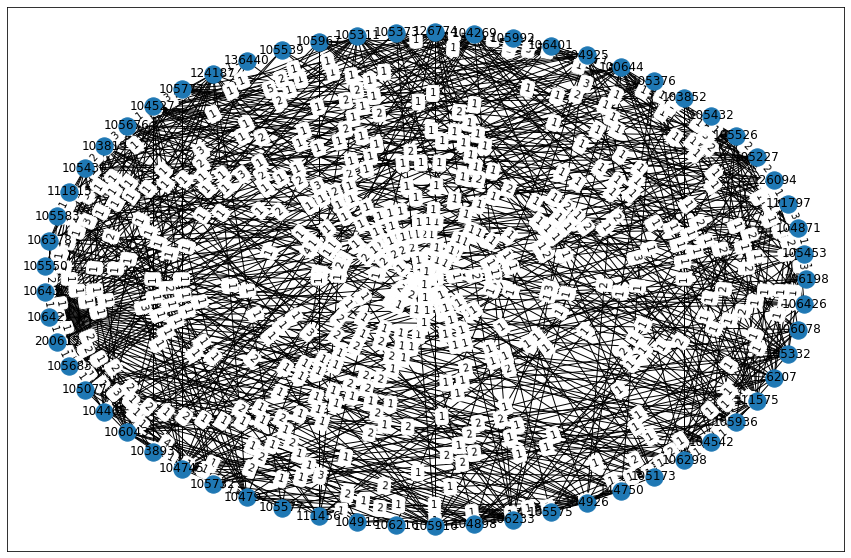

In [23]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, '106421')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Asortativnost:
Homofilija - tendencija ljudi da stvaraju veze sa sebi slicnim ljudima
U analizi socijalnih mreze homofilija u formi asortativnosti - cvorovi imaju tendenciju da se povezuju sa cvorovima slicnog stepena

In [24]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

# asortativnost na osnovu drzave
r3 = nx.attribute_assortativity_coefficient(G, 'country')
print(f"Koeficijent asortativnosti na osnovu drzave: {r3}")

# asortativnost na osnovu ranga
r4 = nx.attribute_assortativity_coefficient(G, 'rank')
print(f"Koeficijent asortativnosti na osnovu ranga: {r4}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.1893631627055268
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.18750548289093133
Koeficijent asortativnosti na osnovu drzave: 0.00474047371358742
Koeficijent asortativnosti na osnovu ranga: -0.0069502359615036206


11)U kojoj meri teniseri imaju tendenciju da se susreću sa istim teniserima? Da li na to utiče njihovo rangiranje na ATP listi?

In [25]:
player_tendency_factors = {}
for player_id in G:
    if G.degree(player_id) != 0:
        player_tendency_factors[player_id] = G.degree(player_id, weight='weight') / G.degree(player_id)
    else:
        player_tendency_factors[player_id] = 0

avg_player_tendency_factor = sum(degreeview[1] for degreeview in G.degree(weight='weight')) / sum(degreeview[1] for degreeview in G.degree())


# effect on ranking
ranks = nx.get_node_attributes(G, 'rank')
data_final = []
for player_id in G:
    data_final.append((player_id, nx.get_node_attributes(G, 'name')[player_id], player_tendency_factors[player_id], ranks[player_id]))
df = pd.DataFrame(data_final, columns=['player_id', 'full_name', 'player_tendency_factors', 'rank'])
df.sort_values(by='player_tendency_factors', ascending=False, inplace=True)

In [26]:
print("Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: " + str(avg_player_tendency_factor))
df.head(n=10)

Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: 1.1694701429772918


,player_id,full_name,player_tendency_factors,rank
232,105385,Donald Young,2.000000,230
133,126774,Stefanos Tsitsipas,1.549020,6
112,104925,Novak Djokovic,1.468085,2
99,104745,Rafael Nadal,1.416667,1
243,106065,Marco Cecchinato,1.392857,71
71,103819,Roger Federer,1.391304,3
12,106233,Dominic Thiem,1.367347,4
308,126610,Matteo Berrettini,1.360000,8
238,105138,Roberto Bautista Agut,1.354167,9
35,133430,Denis Shapovalov,1.346939,15


In [27]:
#12 Koji teniseri predstavljaju jezgro mreze?
core_number = nx.core_number(G)
print(core_number)#dict

max_core_number = max(core_number.values()) #max value u dict
print(max_core_number)

core = nx.k_core(G, max_core_number)
for player_id in core:
    print(player_id)
    print(nx.get_node_attributes(G, 'name')[player_id])

{'106401': 20, '104719': 14, '105373': 20, '105877': 1, '105493': 2, '104527': 20, '104907': 2, '104297': 2, '103970': 12, '104919': 20, '106106': 1, '125842': 1, '106233': 20, '200095': 3, '103990': 1, '105936': 20, '104810': 6, '111581': 3, '106031': 1, '105436': 1, '200611': 3, '105526': 20, '202475': 1, '144984': 1, '126939': 1, '105777': 20, '200615': 20, '103893': 10, '106353': 1, '111192': 1, '122548': 1, '105688': 1, '105023': 20, '105477': 3, '104312': 20, '133430': 20, '105359': 7, '144985': 1, '105051': 15, '106426': 20, '105806': 4, '105216': 6, '208029': 2, '105967': 12, '104804': 1, '105882': 8, '104755': 19, '105815': 17, '105819': 15, '106137': 2, '104978': 2, '104424': 2, '109699': 2, '200031': 1, '200325': 2, '144650': 1, '110536': 2, '111761': 1, '104898': 18, '200553': 1, '144750': 17, '105063': 1, '200221': 9, '105332': 20, '104871': 20, '106214': 4, '105011': 2, '104269': 20, '144841': 2, '109640': 1, '106388': 1, '103819': 20, '126149': 2, '104660': 8, '208230': 

In [28]:
#13 Ko su teniseri koji povezuju razlicite grupe u okviru mreze -> pronalazimo bridgeve u ovkviru mreze grane koje povezuju razlicite grupe u okviru mreze
bridges = nx.bridges(G)
list(bridges)

[('106401', '111515'),
 ('104719', '106412'),
 ('105373', '127157'),
 ('105877', '200526'),
 ('106106', '134770'),
 ('125842', '105575'),
 ('106233', '126609'),
 ('103990', '126237'),
 ('104810', '106227'),
 ('106031', '104871'),
 ('105436', '104534'),
 ('202475', '126328'),
 ('144984', '200175'),
 ('126939', '133975'),
 ('200615', '123983'),
 ('103893', '105091'),
 ('103893', '208260'),
 ('106353', '111442'),
 ('111192', '124116'),
 ('122548', '144707'),
 ('105688', '137018'),
 ('105688', '209226'),
 ('104312', '121531'),
 ('133430', '105015'),
 ('133430', '106110'),
 ('105359', '208597'),
 ('144985', '105376'),
 ('105051', '202090'),
 ('104804', '106216'),
 ('200031', '144719'),
 ('144650', '105812'),
 ('111761', '105657'),
 ('104898', '208103'),
 ('200553', '110748'),
 ('200553', '208230'),
 ('105063', '103333'),
 ('104269', '104735'),
 ('109640', '105227'),
 ('106388', '126555'),
 ('105217', '105173'),
 ('106203', '144719'),
 ('202262', '200250'),
 ('105575', '104534'),
 ('105575',

14. Kolika je gustina svake od modelovanih mreza? 
Gustina mreza moze se odrediti iz Gephi alata (Statistics -> Graph density) 
Racuna se za neusmerene grafove kao d = (2m)/n(n-1)
m -> broj grana
n -> broj cvorova

Rezultat:
<img src="img/graph_density_2019.png" width=1000 height=1000 />

In [29]:
#koristeci python i networkx
density = nx.density(G)
print(f"Gustina mreze koristeci biblioteku network x je: {density}")

Gustina mreze koristeci biblioteku network x je: 0.03599430872158145


In [30]:
#15 U kojoj mrezi povezane i centralizovane mreze
#izracunacemo degree_centrality, closeness_centrality, information_centrality, betweenes_centrality i opisacemo znacenje tih vrednosti
DC = nx.degree_centrality(G)
import operator
dc_items = sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(dc_items)
for dc_item in dc_items:
    node = dc_item[0]
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
#vazni cvorovi imaju veliki broj konekcija; broj direktnih suseda svakog cvora u mrezi
#akteri u mrezi sa vecim brojem relacija manje zavisni u odnosu na druge aktere

CC = nx.closeness_centrality(G)
cc_items = sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(cc_items)
for cc_item in cc_items:
    node = cc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi su blizi drugim cvorovima, vazniji cvorovi centralniji polozaj u mrezi

BC = nx.betweenness_centrality(G)
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(bc_items)
for bc_item in bc_items:
    node = bc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi povezuju druge cvorove, mostovi posrednici izmedju ostalih cvorova u mrezi
#vazni cvorovi se nalaze na vecem broju najkracih putanja

#check if graph is connected
print(nx.is_connected(G))

#graf nije povezan ne moze se izracunati information_centrality
#nije povezan postoji grupa ljudi koji nisu igrali jedni sa drugima -> ne postoji protok informacija

[('106421', 0.1652892561983471), ('105332', 0.14049586776859505), ('126774', 0.14049586776859505), ('100644', 0.14049586776859505), ('106043', 0.13774104683195593)]
Daniil Medvedev 5 RUS 60
Benoit Paire 24 FRA 51
Stefanos Tsitsipas 6 GRE 51
Alexander Zverev 7 GER 51
Diego Schwartzman 14 ARG 50
[('106421', 0.4317160826594789), ('126774', 0.4242825607064018), ('126610', 0.42149122807017547), ('105311', 0.41928446771378713), ('105550', 0.4181897302001741)]
Daniil Medvedev 5 RUS
Stefanos Tsitsipas 6 GRE
Matteo Berrettini 8 ITA
Joao Sousa 60 POR
Guido Pella 25 ARG
[('104655', 0.05609812441566008), ('105311', 0.03892503269486543), ('105575', 0.031647529153889575), ('106233', 0.029002309011648134), ('105550', 0.02853797509659028)]
Pablo Cuevas 45 URU
Joao Sousa 60 POR
Ricardas Berankis 66 LTU
Dominic Thiem 4 AUT
Guido Pella 25 ARG
False


#habovi su vezani za degree_centrality i susedima onim sa najvecim vrednostima ove metrike iscrtati u gephiju videti TODO

16. Koje su prosecne distance, a koliki dijametar u okviru modelovanih mreza? 
Average Path length: 3.045589369909987
Diameter: 9

In [31]:
#17. Kakva je distribucija cvorova po stepenu i da li prati neku zakonomernost? Kako je stepen cvora korelisan sa rejtingom tenisera? 
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 103, 2: 58, 3: 22, 4: 15, 7: 10, 46: 7, 35: 7, 8: 7, 49: 6, 41: 6, 39: 6, 9: 6, 11: 6, 17: 6, 29: 5, 5: 5, 36: 5, 18: 4, 12: 4, 16: 4, 37: 4, 27: 4, 10: 4, 34: 3, 43: 3, 30: 3, 20: 3, 44: 3, 23: 3, 51: 3, 40: 3, 28: 3, 47: 3, 6: 3, 15: 3, 14: 3, 25: 2, 19: 2, 50: 2, 48: 2, 45: 2, 13: 2, 32: 1, 42: 1, 24: 1, 31: 1, 26: 1, 33: 1, 60: 1, 38: 1, 21: 1})


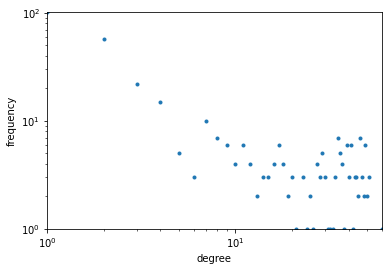

In [32]:
plot_deg_frequency(G)

#raspodela stepena cvora pokazuje da veliki broj cvorova ima stepen 1, odnosno da su igrali samo 1 mec. Sa druge strane, postoji mali broj cvorova sa vecim stepenom. 

#ovakvi cvorovi prate power-law (scale-free) raspodelu


Counter({1: 102, 2: 59, 3: 22, 4: 15, 7: 10, 43: 6, 9: 6, 8: 6, 16: 5, 5: 5, 12: 5, 10: 5, 39: 5, 57: 5, 49: 4, 18: 4, 46: 4, 17: 4, 20: 3, 30: 3, 53: 3, 14: 3, 64: 3, 31: 3, 21: 3, 35: 3, 33: 3, 23: 3, 42: 3, 52: 3, 48: 3, 28: 3, 40: 3, 6: 3, 22: 3, 15: 3, 34: 2, 67: 2, 66: 2, 55: 2, 11: 2, 36: 2, 68: 2, 54: 2, 13: 2, 50: 2, 37: 1, 44: 1, 41: 1, 56: 1, 63: 1, 69: 1, 79: 1, 38: 1, 47: 1, 29: 1, 26: 1, 65: 1, 58: 1, 80: 1, 59: 1, 62: 1, 60: 1, 19: 1})


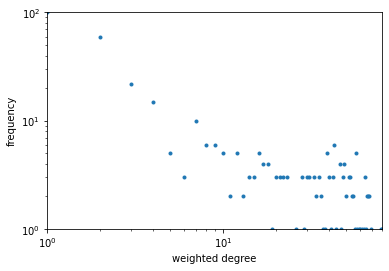

In [33]:
#graf je tezinski trebalo bi i ispitati i raspodelu po stepenu tezinskog grafa
plot_deg_frequency(G, weighted = True)

In [34]:
#kako je stepen cvora korelisan sa rejtingom tenisera
#izracunati stepen cvora i u svakom cvoru cuvamo rang sortirati tu listu po opadajucoj vrednosti ranga i ispisati zakljucke
for node in G.nodes:
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
    
    
#u proseku veci rang veci stepen cvora; Igraci sa vecim rangom imaju veci stepen cvora

Nick Kyrgios 30 AUS 34
Marcel Granollers 111 ESP 18
Martin Klizan 141 SVK 29
Emilio Gomez 146 ECU 1
Tomislav Brkic 548 BIH 2
Stan Wawrinka 16 SUI 43
Jose Rubin Statham 689 NZL 2
Rogerio Dutra Silva 236 BRA 2
David Ferrer 224 ESP 12
Leonardo Mayer 92 ARG 30
George Tsivadze 860 GEO 1
Adam Moundir 454 SUI 1
Dominic Thiem 4 AUT 49
Nicola Kuhn 214 ESP 3
Tommy Robredo 205 ESP 1
Filip Krajinovic 40 SRB 41
Zhe Li 193 CHN 7
Michael Mmoh 218 USA 3
Raymond Sarmiento 561 USA 1
Markus Eriksson 293 SWE 1
Elliot Benchetrit 217 FRA 3
Jan Lennard Struff 35 GER 49
Philip Henning 9223372036854775807 RSA 1
Artem Dubrivnyy 399 RUS 1
Khumoun Sultanov 330 UZB 1
Grigor Dimitrov 20 BUL 39
Alexei Popyrin 97 AUS 30
Paolo Lorenzi 115 ITA 16
Pedja Krstin 246 SRB 1
Lucas Miedler 270 AUT 1
Edan Leshem 387 ISR 1
Manuel Sanchez 838 MEX 2
Sam Querrey 44 USA 37
Marco Trungelliti 209 ARG 5
Andreas Seppi 72 ITA 36
Denis Shapovalov 15 CAN 49
Jason Jung 127 TPE 9
Ergi Kirkin 495 TUR 1
Matthew Ebden 244 AUS 20
Christian Gari

#18. Da li u mrezi postoje habovi i koji su?
Hubovi predstavljaju najvaznije cvorove.Referenca na pitanje 15 i razlicite izracunate centralnosti, samo treba ocitati koji su to teniseri 

In [35]:
#19. Da li mreza iskazuje osobine malog sveta?

#Mreza nije povezana, pa se ne moze izracunati prosecna udaljenost cvorova, vec je moguce naci najvecu povezanu komponentu pa analizirati nju na osnovu prosecne udaljenosti cvorova koja je izracunata i prema koeficijentu klasterizacije izracunatim za tu najvecu komponentu

print(nx.number_connected_components(G))
largest_connected_component = max(nx.connected_components(G), key=len) #vraca set cvorova
print(len(largest_connected_component))

print("Velicine svih povezanih komponenti: ")
for comp in nx.connected_components(G):
          print(len(comp))

#formiramo graf
graph_connected_component = G.copy()
graph_connected_component.remove_nodes_from(G.nodes()-largest_connected_component)
        
var_path = nx.average_shortest_path_length(graph_connected_component)
print(var_path)
print("Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:")
print((var_path/(len(largest_connected_component)))*100)

print("Prosecan koeficijent klasterizacije")
print(nx.average_clustering(graph_connected_component))

#Posto je koeficijent klasterizacije mali ovo ne ispoljava osobina malog sveta

11
342
Velicine svih povezanih komponenti: 
342
2
2
2
2
2
3
3
2
2
2
3.0460462005453515
Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:
0.8906567837851905
Prosecan koeficijent klasterizacije
0.14672264676300403


In [36]:
#20. Ego mreze i osobine
#Novak Djokovic 104925
Novak_ego = nx.ego_graph(G, '104925', undirected=True)
Novak_ego.name = "novak"
print(nx.info(Novak_ego))

#Roger Federer 103819
Roger_ego = nx.ego_graph(G, '103819', undirected=True)
Roger_ego.name = "roger"
print(nx.info(Roger_ego))

#Rafael Nadal 104745
Nadal_ego = nx.ego_graph(G, '104745', undirected=True)
Nadal_ego.name = "nadal"
print(nx.info(Nadal_ego))

#sacuvaj u odredjenom formatu
nx.write_gexf(Novak_ego, "models/djokovic_2019.gexf")
nx.write_gexf(Roger_ego, "models/federer_2019.gexf")
nx.write_gexf(Nadal_ego, "models/nadal_2019.gexf")

#unija Djokovic Federer Nadal
ego_union = nx.disjoint_union(Novak_ego, Roger_ego)
ego_union = nx.disjoint_union(Nadal_ego, Nadal_ego)

ego_graphs = [Novak_ego, Roger_ego, Nadal_ego]

ego_player_nadal_djokovic_federer = set()

for H in ego_graphs:
    for player_id in H: 
        ego_player_nadal_djokovic_federer.add(player_id)
    
print(len(ego_player_nadal_djokovic_federer))
#set objekat je unique, ne dozvoljava duplikate
print(len(skup_id))
#21 analizirati poziciju ego cvora unutar svake od ego mreza TODO(plt.show())
#22 analizirati ugradjenost svake od ego mreza unutar celokupne mreze (TODO)
#23 Unifikacija ego mreza (koliki procenat ucestvuje u njoj). Sprovesti klasterisanje na 3 klastera i na osnovu dobijenih rezultata
#dati interpretaciju kriterijuma pripadnosti klasterima


Name: novak
Type: Graph
Number of nodes: 48
Number of edges: 378
Average degree:  15.7500
Name: roger
Type: Graph
Number of nodes: 47
Number of edges: 381
Average degree:  16.2128
Name: nadal
Type: Graph
Number of nodes: 49
Number of edges: 377
Average degree:  15.3878
88
364


Analiza ugradjenosti svake od ego mreza unutar celokupne mreze (uradjena je u Gephi alatu primenom odgovarajuceg filtera i odgovarajuceg layout-a prikaza za svaki od navedenih cvorova -> unese se id cvora za koji hocemo da prikazemo ego mrezu i primenom odgovarajuceg filtra i nacina prikaza prikaze se jasno definisana struktura ego mreze i njena ugradjenost u celokupnu mrezu) 

Novak Djokovic

<img src="img/graph_ego_djokovic_2019.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/graph_ego_nadal_2019.png" width=1000 height=1000 />

Roger Federer

<img src="img/graph_ego_roger_2019.png" width=1000 height=1000 />



Analiza pozicije svakog ego cvora u okviru sopstvene ego mreze

Novak Djokovic

<img src="img/novak_djokovic_node_2019.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/rafael_nadal_node_2019.png" width=1000 height=1000 />

Roger Federer

<img src="img/roger_federer_node1_2019.png" width=1000 height=1000 />

In [37]:
#23 Analizirati mrezu dobijenu unifikacijom ego mreza clanova Velike trojke. Koji procenat cvorova mreze svih tenisera ucestvuje u njoj. Sprovesti klasterisanje ovako dobijene mreze na 3 klastera i na osnovu dobijenih rezultata dati interpretaciju kriterijuma pripadnosti klasterima

# ego_player_nadal_djokovic_federer igraci iz ego mreza dobijeni njihovom unijom i smesteni u set
# skup_id svi igraci
from networkx.algorithms import community

percentage_ego = (len(ego_player_nadal_djokovic_federer)/len(skup_id))*100
print("Procentualno: ");
print(percentage_ego);

G_copied = G.copy();
G_copied.remove_nodes_from(G.nodes - ego_player_nadal_djokovic_federer)
print(len(G_copied.nodes)) #verifikovano

async_fluids_results = community.asyn_fluidc(G_copied,3, seed = 0) #ovaj algoritam na pocetku izabere nasumicno izabere 3 celine, a onda iterativno dodaje uzimavsi u obzir sam graf i njegove susede. Proces se ponavlja do dostizanja konverfencije
community1 = next(async_fluids_results)
community2 = next(async_fluids_results)
community3 = next(async_fluids_results)
#u zbiru tacno 81
print(len(community1))
print(len(community2))
print(len(community3))
#ispis pripadnosti odgovarajucim cvorovima
print(community1)
print(community2)
print(community3)

#todo formiraj graf u gephiju i analiziraj grupe cvorova koji pripadaju celini

Procentualno: 
24.175824175824175
88
25
27
36
{'126094', '106214', '100644', '104269', '104607', '132283', '105216', '105967', '105430', '104797', '106421', '200615', '105077', '105807', '105732', '106216', '105023', '105643', '106233', '104926', '133430', '105173', '105936', '106228', '105332'}
{'105932', '105227', '200282', '111202', '105376', '105311', '105554', '105870', '127339', '105777', '105676', '105357', '104999', '120424', '106071', '106415', '105550', '103970', '104745', '105223', '111577', '105138', '200000', '144750', '104731', '126207', '144895'}
{'105453', '104871', '106045', '105526', '104925', '106401', '128034', '111576', '126774', '104527', '104755', '103819', '106423', '106378', '106432', '106000', '106043', '104424', '104545', '126610', '134770', '104792', '105902', '104919', '106298', '126203', '106148', '104542', '104259', '111575', '126652', '200005', '105916', '105051', '106099', '106283'}


In [38]:
import matplotlib.pyplot as plt

def draw_rank_correlation(x_rank, y_rank, x_label, y_label, how="scatter"):                                                    
    plt.figure(num=1, figsize=[10, 5])

    labels = x_rank
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y_rank) * 1.1)                                                                                                             
    
    if how == "plot":
        plt.plot(x_rank, y_rank, marker='.')
    else:
        plt.scatter(x_rank, y_rank, marker='.')
    plt.show()

24)Kakva je distribucija broja tenisera u odnosu na broj meceva koji su odigrali?

In [39]:
dataframe_1 = data[['winner_id', 'id', 'tourney_date']]
dataframe_1 = dataframe_1.rename(columns = {'winner_id': 'player_id'})
print(dataframe_1)
dataframe_2 = data[['loser_id', 'id', 'tourney_date']]
dataframe_2 = dataframe_2.rename(columns = {'loser_id': 'player_id'})
print(dataframe_2)
plot_df = pd.concat([dataframe_1, dataframe_2])
plot_df = plot_df.dropna()
plot_df = plot_df.groupby('player_id').size()
print(plot_df)

      player_id    id  tourney_date
0        105453     0      20181231
1        106421     1      20181231
2        105453     2      20181231
3        104542     3      20181231
4        106421     4      20181231
...         ...   ...           ...
2776     111575  2776      20190201
2777     111575  2777      20190201
2778     105053  2778      20190201
2779     123755  2779      20190201
2780     105292  2780      20190201

[2781 rows x 3 columns]
      player_id    id  tourney_date
0        106421     0      20181231
1        104542     1      20181231
2        104871     2      20181231
3        200282     3      20181231
4        105683     4      20181231
...         ...   ...           ...
2776     144817  2776      20190201
2777     105967  2777      20190201
2778     111200  2778      20190201
2779     144707  2779      20190201
2780     111200  2780      20190201

[2781 rows x 3 columns]
player_id
100644    67
103333    26
103819    64
103852    29
103893    16
          .

     player_id  numMatches
207     106421          80
284     126774          79
52      104925          69
39      104745          68
282     126610          68
..         ...         ...
228     111459           1
226     111453           1
38      104735           1
222     111192           1
363     209238           1

[364 rows x 2 columns]
    numMatches  numPlayers
0            1         102
1            2          59
2            3          22
3            4          15
4            5           5
..         ...         ...
59          67           2
60          68           2
61          69           1
62          79           1
63          80           1

[64 rows x 2 columns]


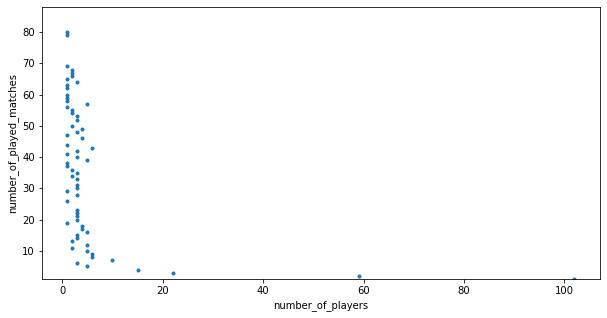

In [40]:
df_tourneys_counts = plot_df.reset_index(name='numMatches')
df_tourneys_counts = df_tourneys_counts.sort_values('numMatches', ascending=False)
df_tourneys_counts = df_tourneys_counts.drop_duplicates()
print(df_tourneys_counts)
df_tourneys_counts_grouped = df_tourneys_counts.groupby('numMatches').size().reset_index(name='numPlayers')
print(df_tourneys_counts_grouped)
draw_rank_correlation(df_tourneys_counts_grouped['numPlayers'], df_tourneys_counts_grouped['numMatches'], 'number_of_players', 'number_of_played_matches', how='scatter')

25)Kakva je distribucija broja turnira u odnosu na podlogu i godinu održavanja?

In [41]:
plot_df = data[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)

  surface  tourneys
0    Clay        34
1   Grass         9
2    Hard        83


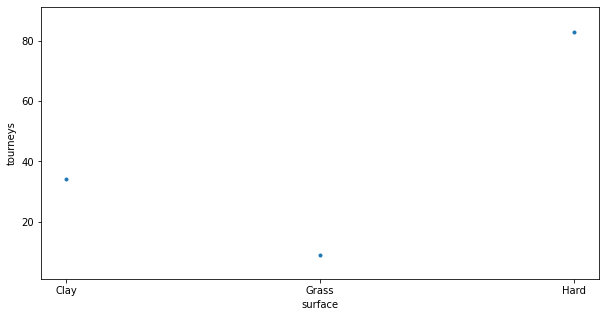

In [42]:
df_tourneys_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_surfaces)
draw_rank_correlation(df_tourneys_surfaces['surface'], df_tourneys_surfaces['tourneys'], 'surface', 'tourneys', how='scatter')

  tourney_date  tourneys
0         2018         3
1         2019       123


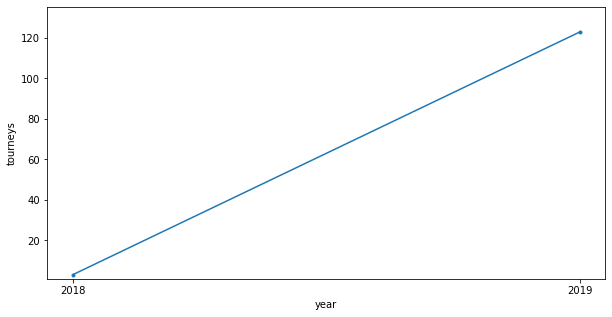

In [43]:
#data has year 2018 and 2019 so because of that we have 2 points in distribution graphic (season 2019 dates: 31. дец 2018. – 24. нов 2019.)
df_tourneys_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_years)
draw_rank_correlation(df_tourneys_years['tourney_date'], df_tourneys_years['tourneys'], 'year', 'tourneys', how='plot')

  surface tourney_date  matches        year
0    Clay         2019      828   Clay 2019
1   Grass         2019      327  Grass 2019
2    Hard         2018       85   Hard 2018
3    Hard         2019     1541   Hard 2019



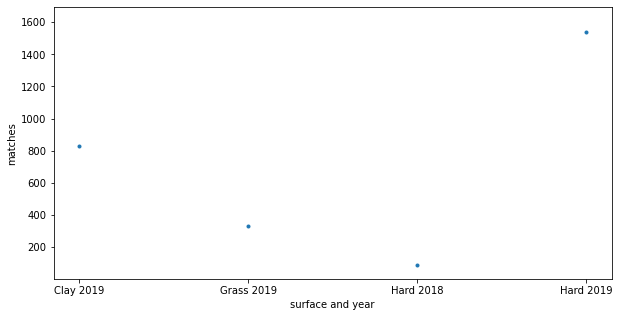

In [44]:
df_matches_surfaces = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
df_matches_surfaces['year'] = df_matches_surfaces[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_matches_surfaces)
print()
draw_rank_correlation(df_matches_surfaces['year'], df_matches_surfaces['matches'], 'surface and year', 'matches')

26)Kakva je distribucija broja mečeva u odnosu na podlogu i godinu održavanja?

In [45]:
plot_df = data[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)

  surface  matches
0    Clay      828
1   Grass      327
2    Hard     1626


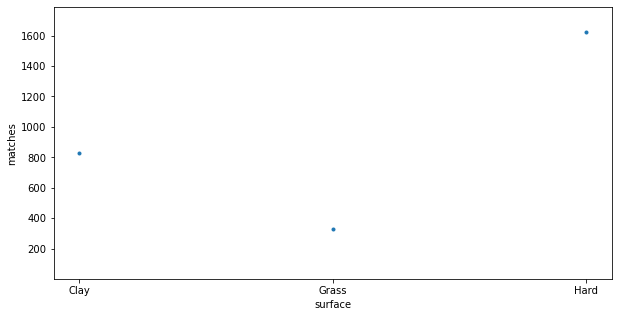

In [46]:
df_matches_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_surfaces)
draw_rank_correlation(df_matches_surfaces['surface'], df_matches_surfaces['matches'], 'surface', 'matches', how='scatter')

  tourney_date  matches
0         2018       85
1         2019     2696


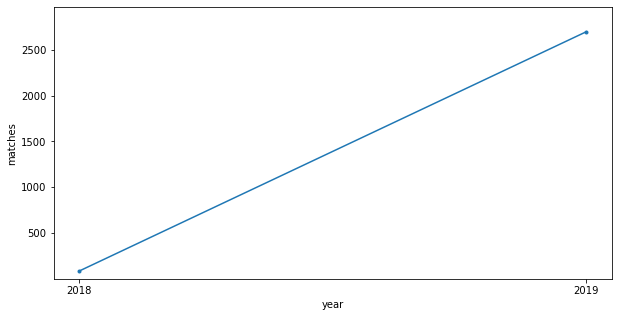

In [47]:
#data has year 2018 and 2019
df_matches_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_years)
draw_rank_correlation(df_matches_years['tourney_date'], df_matches_years['matches'], 'year', 'matches', how='plot')

  surface tourney_date  matches        year
0    Clay         2019      828   Clay 2019
1   Grass         2019      327  Grass 2019
2    Hard         2018       85   Hard 2018
3    Hard         2019     1541   Hard 2019



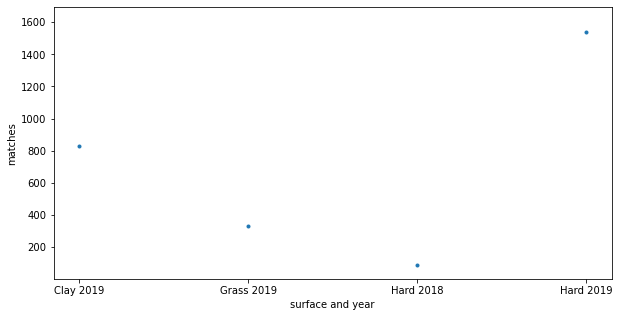

In [48]:
df_matches_surfaces = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
df_matches_surfaces['year'] = df_matches_surfaces[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_matches_surfaces)
print()
draw_rank_correlation(df_matches_surfaces['year'], df_matches_surfaces['matches'], 'surface and year', 'matches')